## Applied Mechanisms and Big Data
### Assignment 2: Poisson
##### Ysbrand Galama, 10262067
##### Koen Keune, 10003527

In [1]:
%pylab inline
from scipy.misc import factorial
from scipy.stats import poisson
from time import time
seed(1)

Populating the interactive namespace from numpy and matplotlib


## 0.1
### a

\begin{align}
P(\text{no one arrives}) = 1 - p \Delta t \\
\end{align}

### b

\begin{align}
P(n| t+\Delta t, t_0) = P(n-1| t, t_0) p \Delta t + P(n| t, t_0) (1 - p \Delta t)
\end{align}

### c

\begin{align}
\frac{\partial P(n|t + \Delta t,t_0)}{\partial t} =& \frac\partial{\partial t} P(n-1| t, t_0) p \Delta t + P(n| t, t_0) (1 - p) \Delta t \\
=& \frac\partial{\partial t} P(n-1| t, t_0) p \Delta t +\underbrace{ P(n| t, t_0)\cdot 1}_\text{const. w.r.t. $t$} - P(n| t, t_0) p \Delta t \\
=& P(n-1| t, t_0) p - P(n| t, t_0) p \\
=& -pP(n|t,t_0) + pP(n-1|t,t_0)
\end{align}

### d

\begin{align}
\frac{\partial P(0|t + \Delta t,t_0)}{\partial t} \overbrace{=}^\text{from c}& -pP(0|t,t_0) + \underbrace{pP(0-1|t,t_0)}_{=0} \\
=& -pP(0|t,t_0)
\end{align}

### e

Given $\sum^\infty_{n=0} P(n|t,t_0) = 1$ and $P(n|t,t_0)=A_n(t)e^{-p(t-t_0)}$:
\begin{align}
\sum^\infty_{n=0} A_n(t)e^{-p(t-t_0)} =& 1 \\
\sum^\infty_{n=0} A_n(t) =& e^{p(t-t_0)} \\
\sum^\infty_{n=0} A_n(t) =& \underbrace{\sum^\infty_{n=0}\frac{(p(t-t_0))^n}{n!} }_\text{definition of $e^x$} \\
A_n(t) =& \frac{(p(t-t_0))^n}{n!} \\[2pc]
P(n|t,t_0)=& A_n(t)e^{-p(t-t_0)} \\
=& \frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}
\end{align}

### f

Using above:
\begin{align}
\mathbb{E}[n] = \sum^\infty_{n=0} nP(n|t,t_0) = \sum^\infty_{n=0} n \frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)}
\end{align}

### g

most likely visitors is:
\begin{align}
P(n|t,t_0) &> P(n-1|t,t_0) \\
\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)} &> \frac{(p(t-t_0))^{n-1}}{(n-1)!}e^{-p(t-t_0)} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^{n-1}}{(n-1)!} \\
\frac{(p(t-t_0))^(n-1)\cdot p(t-t_0)}{(n-1)!\cdot n}&> \frac{(p(t-t_0))^{n-1}}{(n-1)!} \\
\frac{p(t-t_0)}{n}&> 1 \\
p(t-t_0) &> n \\[2pc]
P(n|t,t_0) &> P(n+1|t,t_0) \\
\frac{(p(t-t_0))^n}{n!}e^{-p(t-t_0)} &> \frac{(p(t-t_0))^{n+1}}{(n+1)!}e^{-p(t-t_0)} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^{n+1}}{(n+1)!} \\
\frac{(p(t-t_0))^n}{n!}&> \frac{(p(t-t_0))^n\cdot p(t-t_0)}{n!\cdot (n+1)} \\
1 &> \frac{p(t-t_0)}{n+1} \\
n+1 &> p(t-t_0) \\
n &> p(t-t_0)-1 \\[2pc]
p(t-t_0)-1 &< n < p(t-t_0) \\
\end{align}
So we can find the maximum for $P(n|t,t_0)$ if $p(t-t_0)-1 \leq n \leq p(t-t_0)$ for discrete values of $n$.

### h

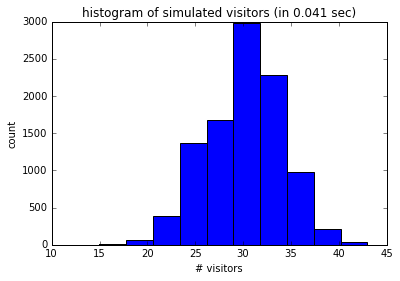

In [2]:
#def P(n,t,t0,p):
#    return (p*(t-t0))**n/factorial(n)*exp(-p*(t-t0))

p = 0.5 #v/m
start = time()
n = np.zeros((10000,1))
dt = 1 #min
for i in arange(0,60,dt):
    n += random.uniform(size=n.shape) < p*dt
end = time()

hist(n)
title('histogram of simulated visitors (in %.3f sec)'%(end-start))
xlabel('# visitors')
ylabel('count')

### i

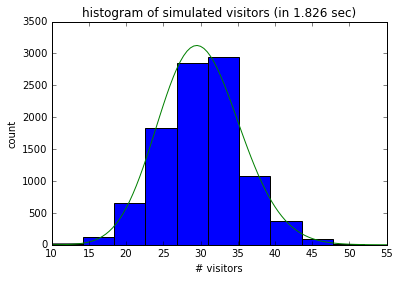

In [3]:
p = 0.5 #v/m
start = time()
n = np.zeros((10000,1))
dt = 1/60
for i in arange(0,60,dt):
    n += random.uniform(size=n.shape) < p*dt
end = time()
hist(n)
title('histogram of simulated visitors (in %.3f sec)'%(end-start))
xlabel('# visitors')
ylabel('count')

x = linspace( *(xlim()+(100,)) )
mu = ceil(p*(60-0))
y = exp(-mu) * mu**x / factorial(x)
plot(x,y*3000/0.07)

The first distribution shows a less accurate representation. This is logical as the amount of simulations is a lot smaller. In the second distribution there is more time to ballance the chances.

### j
$$P(expecting\;n^{th}) = P(n-1\; at\; t\; AND\; arival) = P(n-1|t,t_0) pdt = dt\frac{p(p(t-t_0))^{n-1}e^{-p(t-t_0)}}{(n-1)!} = dtP(t|n,t_0)$$

### k
\begin{align}
\mathbb{E}[t] =& \int_{t_0}^\infty tpe^{-p(t-t_0)}dt \\
=& p\int_{t_0}^\infty te^{-pt}e^{pt_0}dt \\
=& pe^{pt_0}\int_{t_0}^\infty te^{-pt}dt \\
=& pe^{pt_0}\left( \left[\frac{t}{-p}e^{-pt}\right]^\infty_{t_0} -\int_{t_0}^\infty \frac1{-p}e^{-pt}dt \right)\\
=& \left[ pe^{pt_0}\left( \frac{t}{-p}e^{-pt} - \frac1{p^2}e^{-pt}  \right) \right]^\infty_{t_0}\\
=& \left[ -te^{-p(t-t_0)} - \frac1pe^{-p(t-t_0)} \right]^\infty_{t_0} \\
=& \left[ \left(-t - \frac1p\right)e^{-p(t-t_0)} \right]^\infty_{t_0} \\
=& \lim_{x\rightarrow\infty} \left[ \left(-t - \frac1p\right)e^{-p(t-t_0)} \right]^x_{t_0} \\
=& \left(\lim_{x\rightarrow\infty} \left(-x - \frac1p\right)e^{-p(x-t_0)}\right) - \left(-t_0 - \frac1p\right)e^{-p(t_0-t_0)} \\
=& 0 - \left( -t_0 - \frac1p\right) \cdot 1 \\
=& t_0 + \frac1p
\end{align}
Thus the average time for the first visitor is $t_0 + \frac1p$

### l
\begin{align}
P(t_1|1,t_0)\cdot P(t_2|1,t_1) &\\
\int^{t_2}_{t_0} P(t|1,t_0)\cdot P(t_2|1,t)dt =& \int^{t_2}_{t_0}pe^{-p(t-t_0)}pe^{-p(t_2-t)}dt \\
=& \int^{t_2}_{t_0}p^2e^{-p(t-t_0+t_2-t)}dt \\
=& \int^{t_2}_{t_0}p^2e^{-p(t_2-t_0)}dt \\
=& p^2e^{-p(t_2-t_0)}\int^{t_2}_{t_0}dt \\
=& p^2(t_2-t_0)e^{-p(t_2-t_0)} \\
=& \frac{p(p(t_2-t_0))^{2-1}e^{-p(t_2-t_0)}}{(2-1)!} \\
=& P(t_2|2,t_0) & q.e.d.
\end{align}

### m

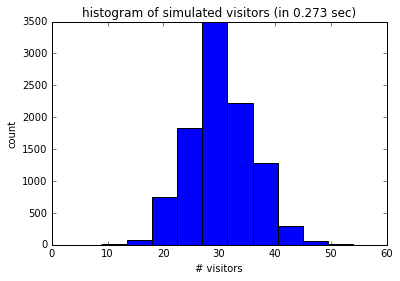

In [4]:
p = 0.5 #v/m
start = time()
t = zeros((1,10000),dtype=float) #min
n = -ones((1,10000),dtype=int) #v
lt = zeros((1,10000),dtype=float) #min
while any(t < 60):
    r = random.uniform(size=n.shape)
    tt = log(r/p)/-p
    b = logical_and(tt > 0 , t < 60)
    n[b] += 1
    t[b] += tt[b]
end = time()

hist(n[0])
title('histogram of simulated visitors (in %.3f sec)'%(end-start))
xlabel('# visitors')
ylabel('count')

There is not much difference between this distribution and the second one. Both follow the poisson reasonable. A difference is the time it took to calculate the third one is more in the same ballpark as the first one, which did not have a satisfiable result.

### n

Now we only need to generate as much times per sample as there are visitors (e.g. $\pm30$). With $\Delta t=1$sec, there were $3600$ generated values per sample. In other words, we now have a better resolution ($\lim_{t\downarrow0} \Delta t$) with just a small part of the computation time.

### o
we want to solve:
\begin{align}
\int_{t_0}^t P(t_n|n,t_0)P(0|t,t_n) dt_n &= \int_{t_0}^t \frac{p(p(t_n-t_0))^{n-1}e^{-p(t_n-t_0)}}{(n-1)!}e^{-p(t-t_n)}dt_n \\
&= \frac{p}{(n-1)!} \int_{t_0}^t (p(t_n-t_0))^{n-1}e^{-p(t_n-t_0)-p(t-t_n)}dt_n \\
&= \frac{p}{(n-1)!} \int_{t_0}^t (p(t_n-t_0))^{n-1}e^{-p(t-t_0)}dt_n \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \int_{t_0}^t (p(t_n-t_0))^{n-1}dt_n \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \left[ \frac1{pn}(p(t_n-t_0))^{n} \right]_{t_0}^t \\
&= \frac{p}{(n-1)!}e^{-p(t-t_0)} \left( \left( \frac1{np}(p(t-t_0))^{n} \right) - \underbrace{\left( \frac1{np}(p(t_0-t_0))^{n} \right)}_{=0} \right) \\
&= \frac{(p(t-t_0))^{n}}{n!}e^{-p(t-t_0)} \\
&= P(n|t,t_0) & q.e.d
\end{align}

## 0.2
### a

$$ \frac{dP(n|t,t_0)}{dt} = -p(t)\cdot P(n|t,t_0) + p(t)\cdot P(n-1|t,t_0) $$
$$ P(n|t,t_0) = \frac{(p(t)\cdot(t-t_0))^ne^{-p(t)\cdot(t-t_0)}}{n!} $$


### b
The probability of no arival (ever) is:
\begin{align}
\frac{dP(0|\infty,t_0)}{dt} &= -p(\infty)\cdot P(0|\infty,t_0) \\
\end{align}

This probability can't be zero when $\int_{t_0}^\infty p(t) dt = 0$. With a constant rate this would only be possible if $p=0$. 

### c
Constant rate: 
$$ P(t|n,t_0) = \frac{p(p(t-t_0))^{n-1}e^{-p\cdot(t-t_0)}}{(n-1)!} $$
With changing rate: 
$$ P(t|n,t_0) = \frac{( p(s)\int^{t}_{t_0} ds p(s) )^{n-1}e^{-\int^{t}_{t_0} ds p(s)}}{n-1!} $$

### d
\begin{align}
P(t|1,t_0) &= p(t)e^{-\int_{t_0}^tp(s)ds} \\
\int_{t_0}^{t_2}P(t_1|1,t_0)P(t_2|1,t_1)dt_1 &= \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_1}p(s)ds}  p(t_2)e^{-\int_{t_1}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2) \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_1}p(s)ds -\int_{t_1}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2) \int_{t_0}^{t_2} p(t_1)e^{-\int_{t_0}^{t_2}p(s)ds}  dt_1 \\
&= p(t_2)e^{-\int_{t_0}^{t_2}p(s)ds} \int_{t_0}^{t_2} p(t_1)  dt_1 \\
&= P(t_2|1,t_0) P(\ldots) \\
&\vdots \\
&= P(t_2|2,t_0)
\end{align}